In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

## The Happiness Model

Let us assume that the happiness of a person follows a linear model (it's highly non-linear in reality, but that's another story). We assume that the happiness $y$ is explained by first of all being alive, friends and family, college education and job. We describe this as

\begin{align*}
y = X \beta + \epsilon,
\end{align*}

where the _feature_ vector 

\begin{align*}
\beta = [alive, friends and family, education, job]^{T},
\end{align*}

so that our model becomes,

\begin{align*}
happiness &= \beta_0 (alive) + \beta_1 (\textrm{friends and family}) + \beta_2 (education) + \beta_3 (job) + noise\\
\end{align*}

## Colinearity in Data

We choose the vector

\begin{align*}
\beta = [\beta_0, \beta_1, \beta_2, \beta_3]^{T} = [1, 1.5, 0.5, 0.25]^{T},
\end{align*}

so that the underlying model becomes

\begin{align*}
happiness &= 1.0 (alive) + 1.5 (\textrm{friends and family}) + 0.5 (education) + 0.25 (job)\\
\end{align*}

but artificially create colinearity in the our data through the following code:

In [29]:
# Number of observations
N = 10

# Independent columns
x_0 = np.ones(N)
x_1 = np.linspace(0, N-1, num=N)

# Almost colinear columns
x_2 = 3 * x_1 + 1e-10 * x_1**2
x_3 = .5 * x_1 + 2 * x_2 + 1e-10 * x_2**3

# Make the data matrix aka design matrix
X = np.column_stack([x_0, x_1, x_2, x_3])

# The model:
beta = np.array([1, 1.5, .5, .25]).T
m, n = X.shape
noise = 1e-7 * np.random.randn(m)
y = X @ beta + noise

# Pack the data into a data frame
df = pd.DataFrame({'alive': x_0, 'friends_family': x_1, 'college_education': x_2, 'job': x_3, 'happiness': y})
df

,alive,friends_family,college_education,job,happiness
0,1.0,0.0,0.0,0.000000,1.000
1,1.0,1.0,3.0,6.500000,5.625
2,1.0,2.0,6.0,13.000000,10.250
3,1.0,3.0,9.0,19.500000,14.875
4,1.0,4.0,12.0,26.000000,19.500
5,1.0,5.0,15.0,32.500000,24.125
6,1.0,6.0,18.0,39.000001,28.750
7,1.0,7.0,21.0,45.500001,33.375
8,1.0,8.0,24.0,52.000001,38.000
9,1.0,9.0,27.0,58.500002,42.625


### Run the Regression

As expected, running regression on this data gives results where the coefficents estimating $\beta$ swing up and down with large values.

In [34]:
smf.ols(formula='happiness ~ friends_family + college_education + job', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.650e+10
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           5.95e-32
Time:                        23:38:10   Log-Likelihood:                 81.081
No. Observations:                  10   AIC:                            -154.2
Df Residuals:                       6   BIC:                            -153.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0000   8.54e-05   1.17e+04      0.000       1.000       1.000
friends_family     -482.9381   6.96e+05     -0.001      0.999    -1.7e+06     1.7e+06
college_education   162.8056   2.33e+05      0.001      0.999   -5.71e+05    5.71e+05
job                  -0.1313    626.765     -0.000      1.000   -1533.770    1533.507
==============================================================================
Omnibus:                        0.978   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.624
Skew:                           0.000   Prob(JB):                        0.732
Kurtosis:                       1.776   Cond. No.                     9.53e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## SVD


<IPython.core.display.Javascript object>


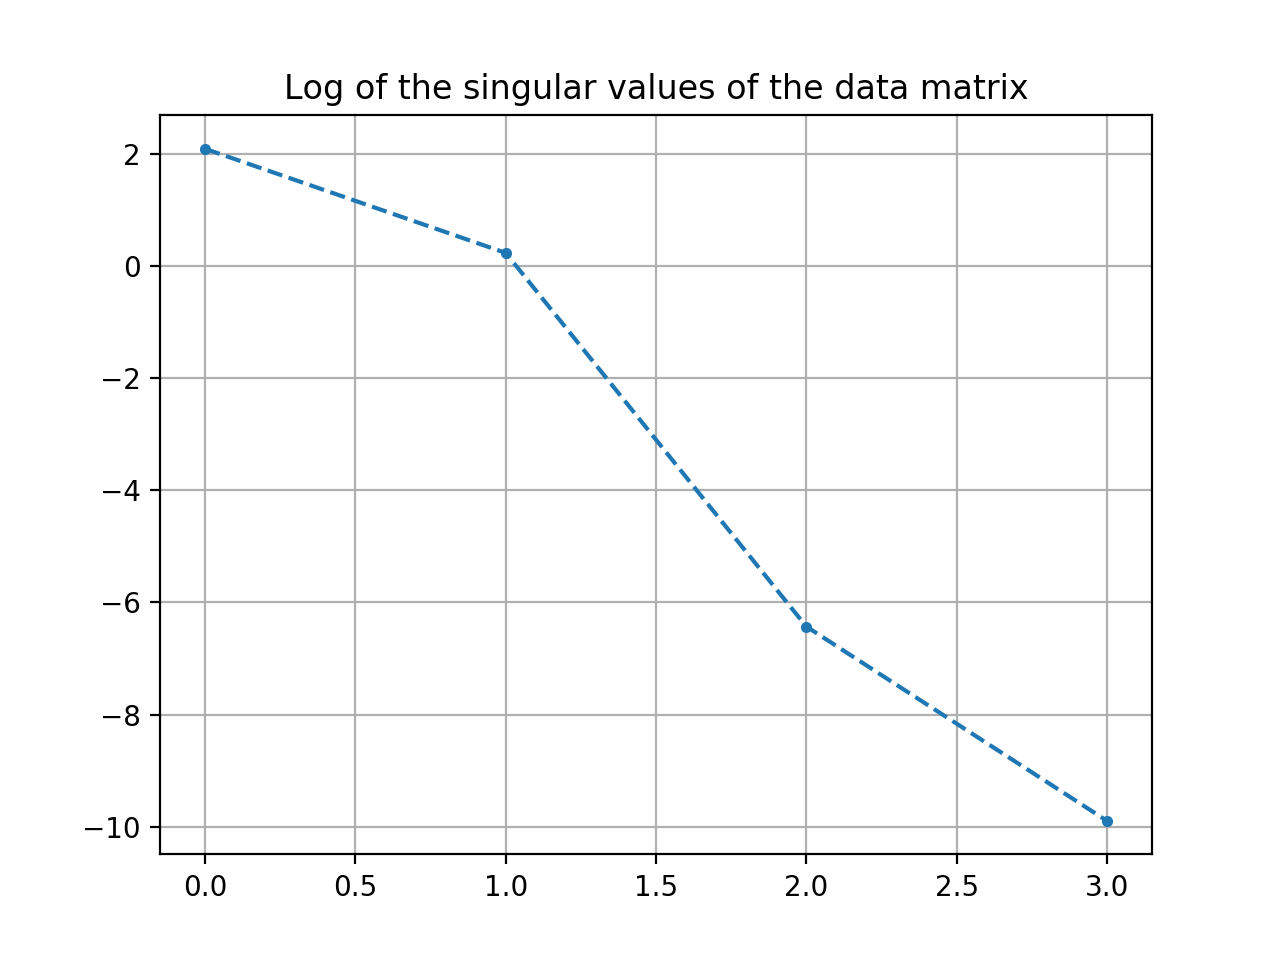

Text(0.5, 1.0, 'Log of the singular values of the data matrix')

In [30]:
U, S, Vt = np.linalg.svd(X)
plt.plot(np.log10(S), '.--')
plt.grid(True)
plt.title('Log of the singular values of the data matrix')

In [35]:
U, S, Vt = np.linalg.svd(X)
r = np.sum(S/S[0] > 1e-4)
V = Vt.T
X_approx = np.sum([np.outer(U[:, i], S[i]*Vt[i, :]) for i in range(r)], axis=0)
# Or we can compute:
# U[:, :r] @ (np.diag(S[:r]) @ Vt[:r, :])
r

2

In [36]:
E = U[:, :r] @ (np.diag(S[:r]) @ Vt[:r, :]) - X_approx
E

array([[ 0.00000000e+00,  1.22356556e-20,  8.55317988e-19,
         1.15709995e-18],
       [ 0.00000000e+00,  2.22044605e-16,  0.00000000e+00,
         0.00000000e+00],
       [-2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [37]:
E = U[:, :r] @ (np.diag(S[:r]) @ Vt[:r, :]) - X
np.max(np.abs(E))

1.8853549477171327e-07

In [38]:
np.linalg.norm(X_approx - X, 2 )

3.7229780976852545e-07

In [39]:
df_approx = df.copy()
df_approx[['alive', 'friends_family', 'college_education', 'job']] = X_approx
df_approx

,alive,friends_family,college_education,job,happiness
0,1.0,4.631656e-08,1.377497e-07,-7.070241e-08,1.000
1,1.0,1.000000e+00,3.000000e+00,6.500000e+00,5.625
2,1.0,2.000000e+00,6.000000e+00,1.300000e+01,10.250
3,1.0,3.000000e+00,9.000000e+00,1.950000e+01,14.875
4,1.0,4.000000e+00,1.200000e+01,2.600000e+01,19.500
5,1.0,5.000000e+00,1.500000e+01,3.250000e+01,24.125
6,1.0,6.000000e+00,1.800000e+01,3.900000e+01,28.750
7,1.0,7.000000e+00,2.100000e+01,4.550000e+01,33.375
8,1.0,8.000000e+00,2.400000e+01,5.200000e+01,38.000
9,1.0,9.000000e+00,2.700000e+01,5.850000e+01,42.625


In [40]:
df_approx - df

,alive,friends_family,college_education,job,happiness
0,-2.631229e-14,4.631656e-08,1.377497e-07,-7.070241e-08,0.0
1,-1.210143e-14,2.108173e-08,6.284517e-08,-3.224881e-08,0.0
2,8.881784e-16,-2.076552e-09,-6.029667e-09,3.102382e-09,0.0
3,1.154632e-14,-2.114296e-08,-6.282890e-08,3.225071e-08,0.0
4,1.887379e-14,-3.410220e-08,-1.015066e-07,5.209568e-08,0.0
5,2.153833e-14,-3.893894e-08,-1.160168e-07,5.953683e-08,0.0
6,1.865175e-14,-3.363789e-08,-1.003137e-07,5.147368e-08,0.0
7,8.659740e-15,-1.618373e-08,-4.835120e-08,2.480574e-08,0.0
8,-8.881784e-15,1.543885e-08,4.591655e-08,-2.356746e-08,0.0
9,-3.619327e-14,6.324517e-08,1.885355e-07,-9.674640e-08,0.0


In [41]:
smf.ols(formula='happiness ~ friends_family + college_education + job', data=df_approx).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.341e+16
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           6.93e-65
Time:                        23:39:27   Log-Likelihood:                 142.99
No. Observations:                  10   AIC:                            -282.0
Df Residuals:                       8   BIC:                            -281.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0000   9.81e-08   1.02e+07      0.000       1.000       1.000
friends_family        0.0885   3.52e-10   2.52e+08      0.000       0.089       0.089
college_education     0.2656   1.05e-09   2.52e+08      0.000       0.266       0.266
job                   0.5754   2.28e-09   2.52e+08      0.000       0.575       0.575
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.735
Skew:                           0.447   Prob(JB):                        0.692
Kurtosis:                       2.017   Cond. No.                     6.39e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
X_rand = X + 1e-6*np.random.randn(X.shape[0], X.shape[1])
df_rand = df.copy()
df_rand[['alive', 'friends_family', 'college_education', 'job']] = X_rand
df_rand

,alive,friends_family,college_education,job,happiness
0,0.999999,3.188666e-07,-5.274393e-07,-1.920243e-07,1.000000
1,1.000001,1.000002e+00,3.000010e+00,6.500289e+00,5.625077
2,1.000001,1.999999e+00,6.000040e+00,1.300224e+01,10.250580
3,1.000000,3.000000e+00,9.000091e+00,1.950747e+01,14.876912
4,1.000000,4.000000e+00,1.200016e+01,2.601760e+01,19.504480
5,0.999999,5.000000e+00,1.500025e+01,3.253425e+01,24.133688
6,1.000000,5.999999e+00,1.800036e+01,3.905904e+01,28.764941
7,1.000000,6.999999e+00,2.100049e+01,4.559360e+01,33.398644
8,1.000001,8.000000e+00,2.400064e+01,5.213953e+01,38.035203
9,0.999999,8.999999e+00,2.700081e+01,5.869847e+01,42.675022


In [42]:
smf.ols(formula='happiness ~ friends_family + college_education + job', data=df_rand).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.660e+14
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           3.57e-43
Time:                        23:39:56   Log-Likelihood:                 124.14
No. Observations:                  10   AIC:                            -240.3
Df Residuals:                       6   BIC:                            -239.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0000   1.19e-06    8.4e+05      0.000       1.000       1.000
friends_family        1.4843      0.090     16.462      0.000       1.264       1.705
college_education     0.5053      0.030     16.717      0.000       0.431       0.579
job                   0.2500   8.05e-05   3105.568      0.000       0.250       0.250
==============================================================================
Omnibus:                        1.746   Durbin-Watson:                   2.892
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.048
Skew:                          -0.512   Prob(JB):                        0.592
Kurtosis:                       1.789   Cond. No.                     9.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""